In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  PIL import Image


In [29]:


#import data

data = []

# Specify the path to your dataset
dataset_path = '../data/images/'

# Iterate through each plant folder
for plant_class in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, plant_class)
    
    # Iterate through each image in the plant folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        data.append({'Image_Path': image_path, 'Class': plant_class})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

df

,Image_Path,Class
0,../data/images/Tomato___spider_mites/fa05ccd2-...,Tomato___spider_mites
1,../data/images/Tomato___spider_mites/fd3b6292-...,Tomato___spider_mites
2,../data/images/Tomato___spider_mites/82306885-...,Tomato___spider_mites
3,../data/images/Tomato___spider_mites/9c7f0991-...,Tomato___spider_mites
4,../data/images/Tomato___spider_mites/d7c5cad4-...,Tomato___spider_mites
...,...,...
95863,../data/images/Soybean___healthy/57c18b39-2a33...,Soybean___healthy
95864,../data/images/Soybean___healthy/4fdc663e-a8ea...,Soybean___healthy
95865,../data/images/Soybean___healthy/df807f13-078b...,Soybean___healthy
95866,../data/images/Soybean___healthy/60bf9858-951a...,Soybean___healthy


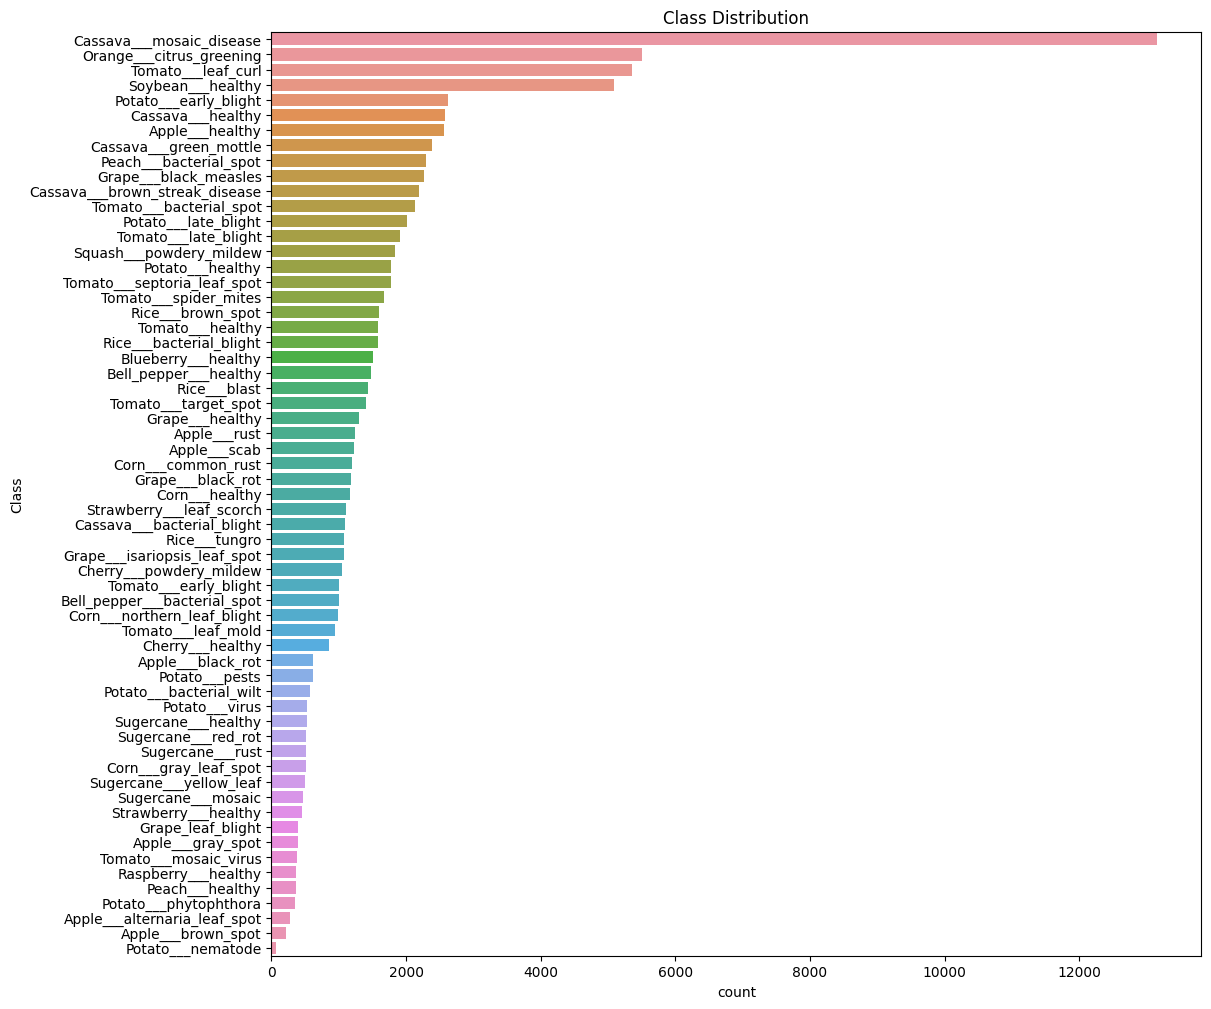

In [30]:
# Check the distribution of classes
class_counts = df['Class'].value_counts()
plt.figure(figsize=(12, 12))
sns.countplot(y='Class', data=df, order=class_counts.index)
plt.title('Class Distribution')
plt.show()

In [35]:
# Extract plant types from class names
df['plant_type'] = df['Class'].apply(lambda x: x.split('___')[0])

# Count the occurrences of each plant type
plant_type_counts = df['plant_type'].value_counts()

# Display the count of each plant type
print(plant_type_counts)

plant_type
Cassava        21397
Tomato         18160
Potato          8552
Apple           6542
Grape           6232
Rice            5704
Orange          5507
Soybean         5090
Corn            3852
Peach           2657
Sugercane       2521
Bell_pepper     2475
Cherry          1906
Squash          1835
Strawberry      1565
Blueberry       1502
Raspberry        371
Name: count, dtype: int64


In [32]:
problematic_rows = df[df['Class'].apply(lambda x: len(x.split('___')) < 2)]
print("Problematic Rows:")
print(problematic_rows)

Problematic Rows:
                                              Image_Path              Class   
22632  ../data/images/Grape_leaf_blight/5d261e2e-5541...  Grape_leaf_blight  \
22633  ../data/images/Grape_leaf_blight/d5a4f65f-7d27...  Grape_leaf_blight   
22634  ../data/images/Grape_leaf_blight/54a17d93-22ce...  Grape_leaf_blight   
22635  ../data/images/Grape_leaf_blight/04d59dc2-2133...  Grape_leaf_blight   
22636  ../data/images/Grape_leaf_blight/d5d5532f-7fbd...  Grape_leaf_blight   
...                                                  ...                ...   
23027  ../data/images/Grape_leaf_blight/9c6fb219-6111...  Grape_leaf_blight   
23028  ../data/images/Grape_leaf_blight/ba8778b1-8caf...  Grape_leaf_blight   
23029  ../data/images/Grape_leaf_blight/b59823b4-69a0...  Grape_leaf_blight   
23030  ../data/images/Grape_leaf_blight/2c135c30-428c...  Grape_leaf_blight   
23031  ../data/images/Grape_leaf_blight/6e4d7942-a265...  Grape_leaf_blight   

              plant_type  
22632 

In [33]:

#problematic_rows = df[df['Class'].str.contains('Grape_leaf_blight')]
df['Class'] = df['Class'].replace('Grape_leaf_blight', 'Grape___leaf_blight', regex=True)


In [37]:
# Extract disease types from class names
df['disease_type'] = df['Class'].apply(lambda x: x.split('___')[1])

# Count the occurrences of each disease type
disease_type_counts = df['disease_type'].value_counts()

# Display the count of each disease type
print(disease_type_counts)

disease_type
healthy                 21615
mosaic_disease          13158
citrus_greening          5507
bacterial_spot           5421
leaf_curl                5357
late_blight              3929
early_blight             3628
powdery_mildew           2887
bacterial_blight         2671
green_mottle             2386
black_measles            2271
brown_streak_disease     2189
brown_spot               1815
black_rot                1801
septoria_leaf_spot       1771
rust                     1755
spider_mites             1676
blast                    1440
target_spot              1404
scab                     1222
common_rust              1192
leaf_scorch              1109
tungro                   1080
isariopsis_leaf_spot     1076
northern_leaf_blight      985
leaf_mold                 952
pests                     611
bacterial_wilt            569
virus                     532
red_rot                   518
gray_leaf_spot            513
yellow_leaf               505
mosaic                    4

In [39]:
df['disease_type'].nunique()

39

In [ ]:

# Display sample images from each class
class_folders = os.listdir(dataset_path)
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    sample_image = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, sample_image)
    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Class: {class_folder}")
    plt.show()